In [14]:
import pandas as pd

sheets = pd.read_csv('Covid_19_tweets_train.csv', encoding= "latin1")

size = sheets['OriginalTweet'].shape[0]

In [15]:
import pkg_resources
import re, string, json
from tqdm import tqdm
from collections import Counter

In [16]:
test_exp = 18

In [17]:
import re

#result1 = []

#for i in range(size):
#    result1.append(sheets['OriginalTweet'][i])
#print(result1[test_exp])

In [18]:
def simplify_punctuation_and_whitespace(sentence):
    #norm_sents = []
    #print("Normalizing whitespaces and punctuation\n----------------------------")
    sentence = _replace_urls(sentence)
    sentence = _simplify_punctuation(sentence)
    sentence = _normalize_whitespace(sentence)
    return sentence

def _replace_urls(text):
    """
    Get rid of URLs and Mentions
    """
    url_regex = r'(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]+\.[^\s]{2,}|www\.[a-zA-Z0-9]+\.[^\s]{2,})'
    text = re.sub(url_regex, "", text)
    text = re.sub(r'@\w+', '', text)
    
    return text

def _simplify_punctuation(text):
    corrected = str(text)
    corrected = re.sub(r'([!?,;])\1+', r'\1', corrected)       # simplifie doubled or more complex punctuation
    corrected = re.sub(r'\.(\.| \.){1,}', r'...', corrected)   # unify repeted dots
    corrected = re.sub(r'â|Â[\x92]|â|Â[\x93]', "'", corrected) # unrecognized charecters that can be a ( ' )
    corrected = re.sub(r'[^\x20-\x7E]', "", corrected)         # dispose unrecognized charecters 
    corrected = re.sub(r'([\w])\1{2,}', r'\1', corrected)      # simplifie repeted letters
    return corrected

def _normalize_whitespace(text):
    """
    This function normalizes whitespaces, removing duplicates.
    """
    corrected = str(text)
    corrected = re.sub(r"//t",r"\t", corrected)
    corrected = re.sub(r"( )\1+",r"\1", corrected)
    corrected = re.sub(r"(\n)\1+",r"\1", corrected)
    corrected = re.sub(r"(\r)\1+",r"\1", corrected)
    corrected = re.sub(r"(\t)\1+",r"\1", corrected)
    return corrected.strip(" ")

In [19]:
print("Normalizing whitespaces and punctuation\n----------------------------")
#result2 = simplify_punctuation_and_whitespace(result1)
orgTweets = sheets['OriginalTweet']
orgTweets = orgTweets.apply(simplify_punctuation_and_whitespace)
print(orgTweets[test_exp])
sheets.head()

Normalizing whitespaces and punctuation
----------------------------
Amazon Glitch Stymies Whole Foods, Fresh Grocery Deliveries'As COVID-19 has spread, we've seen a significant increase in people shopping online for groceries, a spokeswoman said in a statement. 'Today this resulted in a systems impact affecting our ...


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [20]:
def unify_whitespace(sentence):
    return re.sub(r'\r|\n|\t', ' ',sentence)

In [21]:
#result3 = []
  
#for i in range(size):
    #result3.append(re.sub(r'\r|\n|\t', ' ',result2[i])) # unify whitespace
orgTweets = orgTweets.apply(unify_whitespace)
print(orgTweets[test_exp])
sheets.head()

Amazon Glitch Stymies Whole Foods, Fresh Grocery Deliveries'As COVID-19 has spread, we've seen a significant increase in people shopping online for groceries, a spokeswoman said in a statement. 'Today this resulted in a systems impact affecting our ...


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [30]:
from nltk.tokenize import TweetTokenizer
import nltk

#result4 = []
#temp = []
#tweet_tokenizer = TweetTokenizer() # Here we use the Tweet Tokenizer for our examples

#for i in range(size):
    #tokens = tweet_tokenizer.tokenize(result3[i])
    #result4.append(tokens)
    #num = len(result4[i])
    #if num > 3:
        #for j in range(num - 3): # faceing a problem with Hashtags with "?"
            #if result4[i][j] == "#COVID" and result4[i][j+1] == "?" and result4[i][j+2] == "19":
                #result4[i][j] = "#COVID?19"
                #result4[i].pop(j+1)
                #result4[i].pop(j+1)
                #break

#print(result4[test_exp])
def tokenize(sentence):
    tweet_tokenizer = TweetTokenizer() 
    tokens = tweet_tokenizer.tokenize(sentence)
    return ' '.join(tokens).strip()

In [31]:
orgTweets = orgTweets.apply(tokenize)
print(orgTweets[test_exp])
sheets.head()

Amazon Glitch Stymies Whole Foods , Fresh Grocery Deliveries'As COVID - 19 has spread , we've seen a significant increase in people shopping online for groceries , a spokeswoman said in a statement . ' Today this resulted in a systems impact affecting our ...


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [32]:
print(orgTweets[6])

Cashier at grocery store was sharing his insights on #Covid_19 To prove his credibility he commented " I'm in Civics class so I know what I'm talking about " .


In [33]:
def normalize_contractions(sentence):
    contraction_list = json.loads(open('english_contractions.json', 'r').read())
    #norm_sents = []
    #print("Normalizing contractions\n----------------------------")
    tokens = sentence.split()
    temp = _normalize_contractions_text(tokens, contraction_list)
    return ' '.join(temp).strip()

def _normalize_contractions_text(token_list, contractions):
    """
    This function normalizes english contractions. exp: I'm --> I am
    """
    new_token_list = []
    #token_list = text.split()
    for word_pos in range(len(token_list)):
        word = token_list[word_pos]
        first_upper = False
        if word and word[0].isupper():
            first_upper = True
        if word.lower() in contractions:
            replacement = contractions[word.lower()]
            if first_upper:
                replacement = replacement[0].upper()+replacement[1:]
            replacement_tokens = replacement.split()
            if len(replacement_tokens)>1:
                new_token_list.append(replacement_tokens[0])
                new_token_list.append(replacement_tokens[1])
            else:
                new_token_list.append(replacement_tokens[0])
        else:
            new_token_list.append(word)
    return new_token_list

In [34]:
#result5 = normalize_contractions(result4)
#print(result5[test_exp])

orgTweets = orgTweets.apply(normalize_contractions)
print(orgTweets[test_exp])
sheets.head()


Amazon Glitch Stymies Whole Foods , Fresh Grocery Deliveries'As COVID - 19 has spread , we have seen a significant increase in people shopping online for groceries , a spokeswoman said in a statement . ' Today this resulted in a systems impact affecting our ...


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [35]:
from nltk.corpus import stopwords

#result6 = []
# This regular expression get rid of tokens with numbers and punctuations 
def lemmatize_and_remove_stopwords(sentence):
    pattern = r'^((\d|[-+=!?,;:\/)("])(\d|[-+=!?,;:\/)(. A-z"])*|((\]\[)|[-!?,;:\"$.\'])+|[. ]+)$'
    stop_words = set(stopwords.words('english'))
    wnl = nltk.WordNetLemmatizer()
    tokens = sentence.split()
    lowerCaseTokens = [re.sub(pattern, "", t.lower()) for t in tokens]
    lemmatizedTokens = [wnl.lemmatize(l) for l in lowerCaseTokens if l and len(l) > 1 and not l in stop_words]
    return ' '.join(lemmatizedTokens).strip()

#for i in range(size):
# Turn the words to lower case 
#lowerCaseTokens = [re.sub(pattern, "", t.lower()) for t in result5[i]]
# Lemetize the tokens and remove Stop Words
#lemmatizedTokens = [wnl.lemmatize(l) for l in lowerCaseTokens if l and len(l) > 1 and not l in stop_words]
#result6.append(lemmatizedTokens)

#print(result6[test_exp])
#print(result6[400:405]) 

In [36]:
orgTweets = orgTweets.apply(lemmatize_and_remove_stopwords)
print(orgTweets[test_exp])
print(orgTweets[400:405]) 


amazon glitch stymy whole food fresh grocery deliveries'as covid spread seen significant increase people shopping online grocery spokeswoman said statement today resulted system impact affecting
400    provider feel sick consumer feel sick seek med...
401    amzn new article amazon delivery infrastructur...
402    shopkeeper selling mask highly price r actual ...
403    would love practice social distancing occupati...
404    fear panic seems gripping uk first time today ...
Name: OriginalTweet, dtype: object


In [37]:
print(orgTweets[16])

In [38]:
def ploter(number, all_hash_freq):
    import matplotlib.pyplot as plt 
   
    #left = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
    left = [i for i in range(number)]

    height = [all_hash_freq[key[0]] for key in all_hash_freq.most_common(20)]
  
    tick_label = [key[0] for key in all_hash_freq.most_common(20)]

    plt.subplots(figsize=(15, 5))
    plt.bar(left, height[:number], tick_label = tick_label[:number], 
        width = 0.8, color = 'black') 
  
    plt.xlabel('Hashtags')
    plt.xticks(rotation=45)
    plt.ylabel('No.') 
    plt.title('Common Hashtags') 
    plt.grid()
    plt.show() 

In [26]:
"""
    Here we check the most common Hashtags
"""
all_hash_freq = Counter()

for i in range(size):
    all_hash_freq.update(token for token in result6[i] if token[0] == "#")
    
all_hash_freq.most_common(20)

[('#coronavirus', 15876),
 ('#covid19', 4815),
 ('#covid_19', 3147),
 ('#covid2019', 1662),
 ('#toiletpaper', 1610),
 ('#covid', 1223),
 ('#socialdistancing', 933),
 ('#coronacrisis', 763),
 ('#pandemic', 482),
 ('#stayhome', 459),
 ('#coronavirusoutbreak', 437),
 ('#coronaviruspandemic', 436),
 ('#corona', 426),
 ('#covid-19', 398),
 ('#lockdown', 386),
 ('#retail', 383),
 ('#stayathome', 381),
 ('#supermarket', 371),
 ('#quarantine', 363),
 ('#stayhomesavelives', 357)]

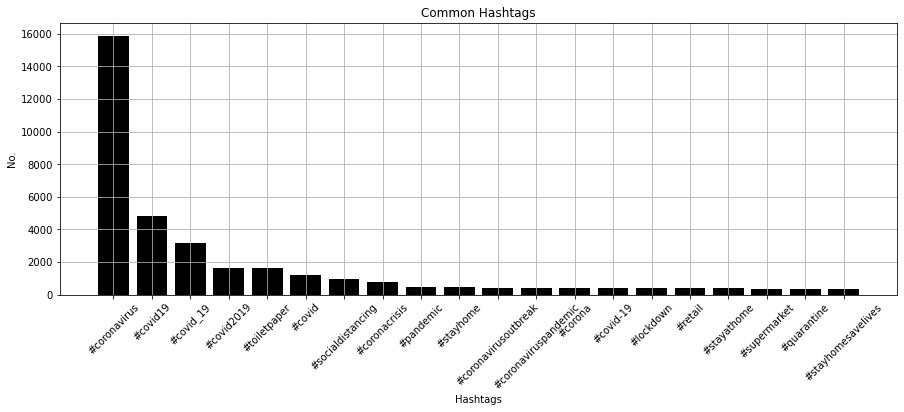

In [27]:
ploter(20 ,all_hash_freq)

In [28]:
"""
    Here we check the most common words
"""
all_words_freq = Counter()

for i in range(size):
    all_words_freq.update(w for w in result6[i] if w[0] != "#")
    
print((all_words_freq.most_common(20)))
print()
print(all_words_freq.most_common()[-50:])

[('covid', 10502), ('price', 8776), ('store', 8095), ('supermarket', 7247), ('food', 6954), ('grocery', 6491), ('people', 5477), ('consumer', 4869), ('shopping', 3348), ('online', 3318), ('need', 3210), ('time', 3097), ('get', 3018), ('worker', 2859), ('pandemic', 2653), ('hand', 2628), ('u', 2608), ('go', 2450), ('panic', 2410), ('like', 2384)]

[('iluminatis', 1), ('iluminati', 1), ('fintwits', 1), ('three-pack', 1), ('tonight.wait', 1), ('environ', 1), ('lett', 1), ('subdued', 1), ('foreseen', 1), ('prices.contac', 1), ('rawalpindi', 1), ('pmsg', 1), ('benny', 1), ('liban', 1), ('marco', 1), ('lauro', 1), ('setterfield', 1), ('lintao', 1), ('spikesas', 1), ('chapple', 1), ('phoenix-area', 1), ('stasis', 1), ('adqcc', 1), ('luxuryhealth', 1), ('luxuryreal-time', 1), ('second-largest', 1), ('penelope', 1), ('aconsumer', 1), ('portalto', 1), ('choked', 1), ('prejudice', 1), ('misperceptions', 1), ('authenticate', 1), ('sneakerheads', 1), ('agtech', 1), ('traction', 1), ('ramp-ups', 1),

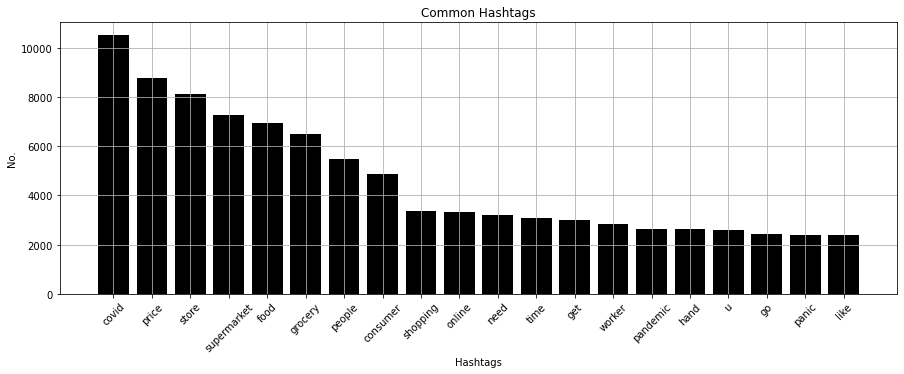

In [29]:
ploter(20, all_words_freq)

In [30]:
from iteration_utilities import Iterable

"""
    Here we check the most common duos of words
"""

biwords_freq = Counter()
for i in range(size):
    biwords_freq.update(Iterable(result6[i]).successive(2).as_counter())
    
biwords_freq.most_common(20)

[(('grocery', 'store'), 5019),
 (('hand', 'sanitizer'), 1487),
 (('#coronavirus', '#covid19'), 1373),
 (('online', 'shopping'), 1302),
 (('toilet', 'paper'), 1231),
 (('#covid19', '#coronavirus'), 1156),
 (('panic', 'buying'), 1064),
 (('oil', 'price'), 926),
 (('covid', 'pandemic'), 885),
 (('social', 'distancing'), 627),
 (('due', 'covid'), 557),
 (('food', 'bank'), 524),
 (('store', 'worker'), 523),
 (('stay', 'home'), 483),
 (('supermarket', 'shelf'), 470),
 (('supply', 'chain'), 466),
 (('#coronavirus', 'pandemic'), 399),
 (('gas', 'price'), 388),
 (('retail', 'store'), 379),
 (('covid', 'crisis'), 377)]

In [31]:
from geotext import GeoText


"""
    Using Geotext we can detect each city/country and refer it to the right country
"""

location_data = sheets['Location']
Contry_tweets = Counter()
locations = []
for m in range(size):
    locations.append([])

for i in range(size):
    hash_count = [token for token in result6[i] if token[0] == "#"] # The number of Hashtags in this ith tweet
    if isinstance(location_data[i], str):
        #print(location_data[i])
        places = GeoText(location_data[i]).country_mentions 
        for key in places:
            locations[i].append(key)
        if not locations[i]:
            tmp = re.search(r'(^USA$)|(^US$)', location_data[i])
            if tmp:
                locations[i].append("US")
            tmp = re.search(r'(^UK$)', location_data[i])
            if tmp:
                locations[i].append("GB")
        if not locations[i]:
            locations[i].append("UnKnown")
        #print(locations[i])
    else:
        locations[i].append("UnKnown")
    
    Contry_tweets.update({locations[i][0]: len(hash_count)})
print(Contry_tweets.most_common())

[('UnKnown', 36090), ('US', 19154), ('GB', 8903), ('IN', 3383), ('CA', 2780), ('AU', 1705), ('ZA', 740), ('NG', 513), ('DE', 426), ('IE', 388), ('PK', 345), ('AE', 342), ('FR', 316), ('CU', 308), ('NZ', 244), ('NL', 244), ('SG', 239), ('ES', 239), ('KE', 232), ('CN', 209), ('PH', 206), ('MY', 194), ('IT', 173), ('BE', 166), ('CH', 148), ('GE', 148), ('BR', 148), ('GH', 142), ('UG', 142), ('BD', 140), ('HK', 132), ('CY', 118), ('SA', 97), ('LK', 97), ('PT', 92), ('JP', 92), ('JM', 74), ('GR', 70), ('TH', 69), ('LB', 68), ('QA', 63), ('AR', 62), ('TR', 62), ('SE', 61), ('FI', 59), ('EG', 59), ('OM', 53), ('ID', 51), ('NO', 50), ('DK', 49), ('MN', 44), ('MX', 44), ('AT', 43), ('IL', 42), ('RU', 40), ('FJ', 40), ('TZ', 38), ('PL', 38), ('VN', 33), ('KW', 32), ('KR', 31), ('UA', 28), ('RW', 28), ('LU', 27), ('HU', 26), ('MA', 26), ('DO', 26), ('NP', 26), ('IQ', 25), ('CO', 21), ('BH', 20), ('CM', 19), ('MT', 19), ('ZW', 18), ('JO', 18), ('CR', 17), ('TW', 16), ('SI', 15), ('BG', 15), ('SL',

In [32]:
Locations_to_plot = Counter()
for key, value in Contry_tweets.most_common()[1:30]:
    Locations_to_plot.update({key : value})

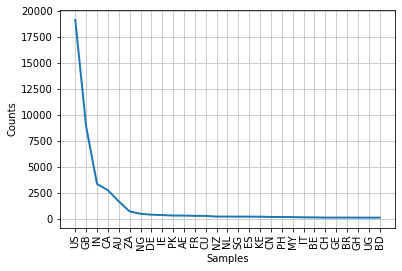

In [33]:
LocationFreqdist = nltk.FreqDist(Locations_to_plot)
LocationFreqdist.plot(30,cumulative=False)

In [34]:
sentiment_count = Counter()
sentiment_count.update(sheets['Sentiment'])
print(sentiment_count.most_common())

[('Positive', 11422), ('Negative', 9917), ('Neutral', 7713), ('Extremely Positive', 6624), ('Extremely Negative', 5481)]


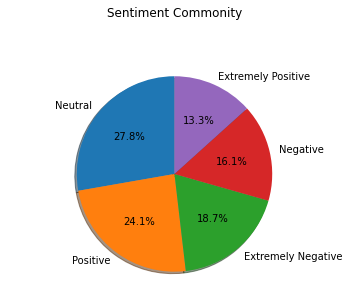

In [35]:
import matplotlib.pyplot as plt

labels = [i for i in sentiment_count]
sizes = [j for i, j in sentiment_count.most_common()]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
ax1.set_title("Sentiment Commonity", pad=50)
plt.show()

In [36]:
def unusual_words(text):
    text_vocab = set(w.lower() for w in text if w.isalpha())
    english_vocab = set(w.lower() for w in nltk.corpus.words.words())
    unusual = text_vocab - english_vocab
    return sorted(unusual)

In [37]:
all_words = []
for tokens in result6:
    for token in tokens:
        all_words.append(token)

In [38]:
"""
    Here we can find the possible wrong words we found in our Tweets
"""
possible_wrong_words = unusual_words(all_words)
print(len(possible_wrong_words))
print(possible_wrong_words[200:250])

15352
['advant', 'advantageof', 'advertised', 'advertisin', 'adviceif', 'advisersthanks', 'advises', 'advising', 'advisorythe', 'advntge', 'advocating', 'aec', 'aeco', 'aedc', 'aedt', 'aen', 'aerated', 'aerion', 'aerosolized', 'aerospace', 'aest', 'aetna', 'af', 'afdb', 'afeez', 'afer', 'affectiva', 'affiliated', 'affirmed', 'affirming', 'affluenza', 'affordability', 'affordably', 'afforded', 'affording', 'affrai', 'affraid', 'afghanistan', 'afn', 'afp', 'afr', 'afraidinslee', 'africa', 'africaannounces', 'africanunion', 'africathis', 'afrorack', 'afry', 'afsc', 'afstand']


In [39]:
from gensim import corpora

id2word = corpora.Dictionary(result6) # turn data to dictionary
corpus = [id2word.doc2bow(text) for text in result6]

In [40]:
import gensim
"""
    Generating the topics
"""
lda = gensim.models.LdaModel(corpus=corpus, id2word=id2word, num_topics=4, passes=10)

In [41]:
lda.print_topics(num_words=6)

[(0,
  '0.055*"#coronavirus" + 0.025*"#covid19" + 0.025*"hand" + 0.023*"sanitizer" + 0.016*"mask" + 0.013*"#socialdistancing"'),
 (1,
  '0.023*"supermarket" + 0.023*"store" + 0.020*"grocery" + 0.018*"people" + 0.013*"food" + 0.012*"#coronavirus"'),
 (2,
  '0.035*"covid" + 0.028*"consumer" + 0.012*"online" + 0.012*"food" + 0.009*"help" + 0.008*"pandemic"'),
 (3,
  '0.053*"price" + 0.021*"covid" + 0.016*"#coronavirus" + 0.011*"oil" + 0.010*"demand" + 0.009*"pandemic"')]

In [29]:
import pyLDAvis.gensim
"""
    Using pyLDAvis model to interpret the topics in a topic model
"""
lda_display = pyLDAvis.gensim.prepare(lda, corpus, id2word, sort_topics=False)
pyLDAvis.enable_notebook()
pyLDAvis.display(lda_display)

In [35]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { max-width:100% !important; }</style>"))
display(HTML("<style>.output_result { max-width:100% !important; }</style>"))
display(HTML("<style>.output_area { max-width:100% !important; }</style>"))
display(HTML("<style>.input_area { max-width:100% !important; }</style>"))

In [22]:
import pandas as pd
import pkg_resources
import re, string, json
from tqdm import tqdm
from collections import Counter
import re
from nltk.tokenize import TweetTokenizer
import nltk
from nltk.corpus import stopwords

In [23]:
def simplify_punctuation_and_whitespace(sentence):
    #norm_sents = []
    #print("Normalizing whitespaces and punctuation\n----------------------------")
    sentence = _replace_urls(sentence)
    sentence = _simplify_punctuation(sentence)
    #sentence = _normalize_whitespace(sentence)
    return sentence

def _replace_urls(text):
    """
    Get rid of URLs and Mentions
    """
    url_regex = r'(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]+\.[^\s]{2,}|www\.[a-zA-Z0-9]+\.[^\s]{2,})'
    text = re.sub(url_regex, "", text)
    text = re.sub(r'@\w+', '', text)
    
    return text

def _simplify_punctuation(text):
    corrected = str(text)
    corrected = re.sub(r'([!?,;])\1+', r'\1', corrected)       # simplifie doubled or more complex punctuation
    corrected = re.sub(r'\.(\.| \.){1,}', r'...', corrected)   # unify repeted dots
    corrected = re.sub(r'â|Â[\x92]|â|Â[\x93]', "'", corrected) # unrecognized charecters that can be a ( ' )
    corrected = re.sub(r'[^\x20-\x7E]', "", corrected)         # dispose unrecognized charecters 
    corrected = re.sub(r'([\w])\1{2,}', r'\1', corrected)      # simplifie repeted letters
    return corrected

def normalize_whitespace(text):
    """
    This function normalizes whitespaces, removing duplicates.
    """
    corrected = str(text)
    corrected = re.sub(r"//t",r"\t", corrected)
    corrected = re.sub(r"( )\1+",r"\1", corrected)
    corrected = re.sub(r"(\n)\1+",r"\1", corrected)
    corrected = re.sub(r"(\r)\1+",r"\1", corrected)
    corrected = re.sub(r"(\t)\1+",r"\1", corrected)
    corrected = re.sub(r'\r|\n|\t', ' ',corrected)
    return corrected.strip(" ")

def tokenize(sentence):
    tweet_tokenizer = TweetTokenizer() 
    tokens = tweet_tokenizer.tokenize(sentence)
    return ' '.join(tokens).strip()

def normalize_contractions(sentence):
    contraction_list = json.loads(open('english_contractions.json', 'r').read())
    #print("Normalizing contractions\n----------------------------")
    tokens = sentence.split(' ')
    temp = _normalize_contractions_text(tokens, contraction_list)
    return ' '.join(temp).strip()

def _normalize_contractions_text(token_list, contractions):
    """
    This function normalizes english contractions. exp: I'm --> I am
    """
    new_token_list = []
    #token_list = text.split()
    for word_pos in range(len(token_list)):
        word = token_list[word_pos]
        first_upper = False
        if word and word[0].isupper():
            first_upper = True
        if word.lower() in contractions:
            replacement = contractions[word.lower()]
            if first_upper:
                replacement = replacement[0].upper()+replacement[1:]
            replacement_tokens = replacement.split()
            if len(replacement_tokens)>1:
                new_token_list.append(replacement_tokens[0])
                new_token_list.append(replacement_tokens[1])
            else:
                new_token_list.append(replacement_tokens[0])
        else:
            new_token_list.append(word)
    return new_token_list

def lemmatize_and_remove_stopwords(sentence):
    pattern = r'^((\d|[-+=!?,;:\/)("])(\d|[-+=!?,;:\/)(. A-z"])*|((\]\[)|[-!?,;:\"$.\'])+|[. ]+)$'
    stop_words = set(stopwords.words('english'))
    wnl = nltk.WordNetLemmatizer()
    tokens = sentence.split(' ')
    lowerCaseTokens = [re.sub(pattern, "", t.lower()) for t in tokens]
    lemmatizedTokens = [wnl.lemmatize(l) for l in lowerCaseTokens if l and len(l) > 1 and not l in stop_words]
    return ' '.join(lemmatizedTokens).strip()

In [24]:
def get_to_work(original_tweets):
    original_tweets = original_tweets.apply(simplify_punctuation_and_whitespace)
    original_tweets = original_tweets.apply(normalize_whitespace)
    original_tweets = original_tweets.apply(tokenize)
    original_tweets = original_tweets.apply(normalize_contractions)
    original_tweets = original_tweets.apply(lemmatize_and_remove_stopwords)
    return original_tweets

In [25]:
sheets = pd.read_csv('Covid_19_tweets_train.csv', encoding= "latin1")

size = sheets['OriginalTweet'].shape[0]

In [26]:
temp = get_to_work(sheets['OriginalTweet'])

In [27]:
sheets['OriginalTweet'] = temp

In [28]:
def normalize_empty_rows(text):
    if len(text) == 0:
        return None
    else:
        return text

In [29]:
sheets['OriginalTweet'] = sheets['OriginalTweet'].apply(normalize_empty_rows)

In [30]:
sheets.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,None,Neutral
1,3800,48752,UK,16-03-2020,advice talk neighbour family exchange phone nu...,Positive
2,3801,48753,Vagabonds,16-03-2020,coronavirus australia woolworth give elderly d...,Positive
3,3802,48754,NaN,16-03-2020,food stock one empty please panic enough food ...,Positive
4,3803,48755,NaN,16-03-2020,ready go supermarket #covid19 outbreak.not par...,Extremely Negative


In [31]:
sheets.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet      33
Sentiment           0
dtype: int64

In [32]:
#sheets = sheets.dropna()

In [33]:
sheets = sheets[pd.notnull(sheets["OriginalTweet"])]

In [34]:
sheets[4000:4010]

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
4006,7805,52757,"London, England",18-03-2020,south korea's heavy reliance third-party merch...,Neutral
4007,7806,52758,"London, England",18-03-2020,vigilant consumer japan public shaming company...,Positive
4008,7807,52759,San Diego,18-03-2020,#breaking senate vote approve house-passed cor...,Positive
4009,7808,52760,"Ottawa, Ontario",18-03-2020,t'was saturday past word eon ago evolution cov...,Extremely Positive
4010,7809,52761,"New York, USA",18-03-2020,face start itching moment walk grocery store #...,Negative
4011,7810,52762,Moulamein NSW Australia,18-03-2020,sunrice prepares tiny harvest stock fly superm...,Neutral
4012,7811,52763,"Chicago, IL / Rincon, PR",18-03-2020,waiting line get grocery store aguada puerto r...,Neutral
4013,7812,52764,"Chicago, IL / Rincon, PR",18-03-2020,really realize much cough touch face standing ...,Neutral
4014,7813,52765,"Los Angeles, CA",18-03-2020,came home market toilet paper paper towel egg ...,Extremely Negative
4015,7814,52766,"Vancouver, British Columbia",18-03-2020,disappointing allow resellers jack price many ...,Negative


In [35]:
print(sheets['OriginalTweet'][4053])

repost discgolfcenter due covid spread limiting retail store le people including employee notice offer store pick well free shipping


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

In [37]:
sentences = sheets['OriginalTweet'].values
y = sheets['Sentiment'].values

sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)

In [38]:
print(len(sentences_train))
print(len(sentences_test))

30843
10281


In [56]:
vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)

X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)

In [57]:
print(X_train[:1])

  (0, 6813)	1
  (0, 10154)	1
  (0, 10602)	1
  (0, 11126)	1
  (0, 13910)	1
  (0, 14002)	1
  (0, 14616)	1
  (0, 14753)	1
  (0, 25480)	1
  (0, 27167)	1
  (0, 29108)	1
  (0, 30770)	1
  (0, 32113)	1


In [58]:
for sen in sheets['OriginalTweet']:
    if "10" in sen:
        print(sen.split())

['feel', 'like', '#lottery', 'much', 'worth', '#stockmarket', '#toiletpaper', '#arizona', '#coronavirus', '#stoppanicbuying', '#foxnews', '#fox10phoenix']
['d.watson', 'f10', 'selling', 'mask', 'high', 'price', 'providing', 'bill', 'receipt', '#coronavirusinpakistan', '#coronavirusoutbreak', '#covid2019']
['supermarket', 'denmark', 'got', 'tired', 'people', 'hoarding', 'hand', 'sanitizer', 'came', 'way', 'stopping', 'bottle', 'kr40', 'bottle', 'kr10', 'bottle.hoarding', 'stopped', '#covid19', '#hoarding', 'via', 'cc']
['lucky', 'year', 'st', "patrick's", 'day', 'midst', 'nationwide', 'closing', 'restaurant', 'public', 'place', 'west', 'coast', 'north', 'eatery', 'bar', 'adjusts', 'meet', "consumer's", 'need', '#covid19', '#curbsidetakeout', 'ampdeliveryoptions', "#la's101northeatery"]
['due', '#coronavirus', 'pandemic', '#ftse100', 'fallen', 'year', 'low', '#oilprices', 'dropped', 'year.demand', 'low', 'energy', 'price', 'cheaper', 'time', 'take', 'advantage', 'secure', 'next', '#energ

In [59]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
score_train = classifier.score(X_train, y_train)
score_test = classifier.score(X_test, y_test)

print("Train Accuracy:", score_train)
print("Ttest Accuracy:", score_test)

Train Accuracy: 0.9391758259572675
Ttest Accuracy: 0.6094737865966345


C:\Users\AdelAKA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
from sklearn import preprocessing

In [61]:
scaler = preprocessing.StandardScaler(with_mean=False).fit(X_train)
scaler.scale_
X_scaled = scaler.transform(X_train)

In [62]:
X_scaled

<30843x36454 sparse matrix of type '<class 'numpy.float64'>'
	with 509225 stored elements in Compressed Sparse Row format>

In [63]:
X_train

<30843x36454 sparse matrix of type '<class 'numpy.int64'>'
	with 509225 stored elements in Compressed Sparse Row format>

In [64]:
scaler = preprocessing.StandardScaler(with_mean=False).fit(X_test)
scaler.scale_
X_test_scaled = scaler.transform(X_test)

In [65]:
classifier = LogisticRegression()
classifier.fit(X_scaled, y_train)
score_train = classifier.score(X_scaled, y_train)
score_test = classifier.score(X_test_scaled, y_test)

print("Train Accuracy:", score_train)
print("Ttest Accuracy:", score_test)

Train Accuracy: 0.9997081995914794
Ttest Accuracy: 0.476023733099893


C:\Users\AdelAKA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [40]:
tfidf = TfidfVectorizer(min_df=2, max_df=0.5, ngram_range=(1, 2))
tfidf.fit(sentences_train) #calcualate the values
X_train = tfidf.transform(sentences_train) #make the vectors
X_test = tfidf.transform(sentences_test)
pd.DataFrame(
    X_train[:10].todense(),
    columns=tfidf.get_feature_names()
)

,10,14days,19,19 at,19 but,19 collapse,19 consumer,19 corona,19 coronavirus,19 covid,...,zone feel,zoo,zoom,zoom meeting,zoonotic,zoonotic deeply,zu,zuku,zweli,zweli mkhize
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.139062,0.0,0.0,0.0,0.0,0.0,0.204623,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
#pd.DataFrame(
#    X_train[24850:24900].todense(),
#    columns=tfidf.get_feature_names()
#)

In [69]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
score_train = classifier.score(X_train, y_train)
score_test = classifier.score(X_test, y_test)

print("Train Accuracy:", score_train)
print("Ttest Accuracy:", score_test)

Train Accuracy: 0.8494634114709982
Ttest Accuracy: 0.5583114483026943


C:\Users\AdelAKA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
def remove_hashtag(sentence):
    tokens = sentence.split(' ')
    noHashtags = [t for t in tokens if t[0] != "#"]
    return ' '.join(noHashtags).strip()

In [71]:
for i in range(len(sentences_train)):
    sentences_train[i] = remove_hashtag(sentences_train[i])
for i in range(len(sentences_test)):
    sentences_test[i] = remove_hashtag(sentences_test[i])

In [72]:
print(sentences_train[:10])

['thank grocery store employee put health greater risk help everyone eat sign'
 'please virtue signal expressing gratitude essential worker word show real gratitude staying home grocery store mental health outing'
 'extra cautious harm disinfecting frequently touched surface disposable cloth tissue alcohol based sanitizer disinfectant ensure surrounding safe'
 'agree leave kid home streamline supermarket visit limit contact potential exposure'
 'rather go supermarket today kept distance amp babybel amp easter egg lunch lunch today'
 'immigrant farm worker work tirelessly keep food table supermarket shelf shelter place hope time lift curtain force people see really foundation country'
 'supermarket sweep near horizon government said lockdown could go forever'
 'online shopping yesfor health covid strategy sure'
 'supermarket assistant went basket today make sure hoarding three anything treated bloke next till loudly telling someone overblown would month'
 'call investor brand credit lin

In [73]:
vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)

X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
score_train = classifier.score(X_train, y_train)
score_test = classifier.score(X_test, y_test)

print("Train Accuracy:", score_train)
print("Ttest Accuracy:", score_test)

Train Accuracy: 0.9255908958272542
Ttest Accuracy: 0.6315533508413579


C:\Users\AdelAKA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [74]:
tfidf = TfidfVectorizer(min_df=2, max_df=0.5, ngram_range=(1, 2))
tfidf.fit(sentences_train) #calcualate the values
X_train = tfidf.transform(sentences_train) #make the vectors
X_test = tfidf.transform(sentences_test)
#pd.DataFrame(
#    X_train[:10].todense(),
#    columns=tfidf.get_feature_names()
#)

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
score_train = classifier.score(X_train, y_train)
score_test = classifier.score(X_test, y_test)

print("Train Accuracy:", score_train)
print("Ttest Accuracy:", score_test)

Train Accuracy: 0.8499497454851992
Ttest Accuracy: 0.5715397334889603


C:\Users\AdelAKA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [47]:
all_words_freq = Counter()

for sentence in sentences_train:
    all_words_freq.update(w for w in sentence.split())

In [48]:
un_needed = []
for k, v in all_words_freq.most_common()[:6]:
    un_needed.append(k)
print(un_needed)

['#coronavirus', 'covid', 'price', 'store', 'supermarket', 'food']


In [49]:
def remove_most_common(sentence):
    tokens = sentence.split(' ')
    noHashtags = [t for t in tokens if not t in un_needed]
    return ' '.join(noHashtags).strip()

In [78]:
for i in range(len(sentences_train)):
    sentences_train[i] = remove_most_common(sentences_train[i])
for i in range(len(sentences_test)):
    sentences_test[i] = remove_most_common(sentences_test[i])

In [79]:
vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)

X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
score_train = classifier.score(X_train, y_train)
score_test = classifier.score(X_test, y_test)

print("Train Accuracy:", score_train)
print("Ttest Accuracy:", score_test)

Train Accuracy: 0.9273092760107642
Ttest Accuracy: 0.6308724832214765


C:\Users\AdelAKA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [80]:
tfidf = TfidfVectorizer(min_df=2, max_df=0.5, ngram_range=(1, 2))
tfidf.fit(sentences_train) #calcualate the values
X_train = tfidf.transform(sentences_train) #make the vectors
X_test = tfidf.transform(sentences_test)
#pd.DataFrame(
#    X_train[:10].todense(),
#    columns=tfidf.get_feature_names()
#)

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
score_train = classifier.score(X_train, y_train)
score_test = classifier.score(X_test, y_test)

print("Train Accuracy:", score_train)
print("Ttest Accuracy:", score_test)

Train Accuracy: 0.850014590020426
Ttest Accuracy: 0.5748468047855267


C:\Users\AdelAKA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [81]:
pd.DataFrame(
   X_train[:10].todense(),
    columns=tfidf.get_feature_names()
)

,19,19 at,19 but,19 in,19 my,19 people,19 please,19 read,19 the,19 we,...,zone feel,zoo,zoom,zoom meeting,zoonotic,zoonotic deeply,zu,zuku,zweli,zweli mkhize
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
def switch_hashtag_to_words(sentence):
    tokens = sentence.split(' ')
    cleanTokens = [re.sub(r'[#_]', " ", t) for t in tokens]
    ignore_numbers = [re.sub(r'\d', "", t) for t in cleanTokens]
    return ' '.join(ignore_numbers).strip()

In [42]:
sentences = sheets['OriginalTweet'].values
y = sheets['Sentiment'].values

sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)

In [50]:
for i in range(len(sentences_train)):
    sentences_train[i] = remove_most_common(switch_hashtag_to_words(sentences_train[i]))
for i in range(len(sentences_test)):
    sentences_test[i] = remove_most_common(switch_hashtag_to_words(sentences_test[i]))

In [85]:
print(sentences_train[:10])

['coronavirus thank employee put health greater risk help everyone eat sign'
 'please virtue signal expressing gratitude essential worker word show real gratitude staying home mental health outing  essentialworker  stayhomesavelives'
 'extra cautious harm disinfecting frequently touched surface disposable cloth tissue alcohol based sanitizer disinfectant ensure surrounding safe  sanitize  covid-  coronavirus  stayfit  familycarehospitals'
 'agree leave kid home streamline visit limit contact potential exposure'
 'rather go today kept distance amp babybel amp easter egg lunch lunch today'
 'immigrant farm worker work tirelessly keep table shelf shelter place hope time lift curtain force people see really foundation country'
 'sweep near horizon government said lockdown could go forever    coronavirus'
 'online shopping yesfor health strategy sure'
 'assistant went basket today make sure hoarding three anything treated bloke next till loudly telling someone overblown would month  coronav

In [51]:
tfidf = TfidfVectorizer(min_df=2, max_df=0.5, ngram_range=(1, 2))
tfidf.fit(sentences_train) #calcualate the values
X_train = tfidf.transform(sentences_train) #make the vectors
X_test = tfidf.transform(sentences_test)
pd.DataFrame(
    X_train[:10].todense(),
    columns=tfidf.get_feature_names()
)

,aa,aalto,aalto university,aaluminium,aaluminium ingot,aap,aapl,aaron,aaron holm,aata,...,zoo,zoom,zoom coronavirus,zoom meeting,zoonotic,zoonotic deeply,zu,zuku,zweli,zweli mkhize
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)

X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
score_train = classifier.score(X_train, y_train)
score_test = classifier.score(X_test, y_test)

print("Train Accuracy:", score_train)
print("Ttest Accuracy:", score_test)

Train Accuracy: 0.9429368090004215
Ttest Accuracy: 0.6102519210193561


C:\Users\AdelAKA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [87]:
tfidf = TfidfVectorizer(min_df=2, max_df=0.5, ngram_range=(1, 2))
tfidf.fit(sentences_train) #calcualate the values
X_train = tfidf.transform(sentences_train) #make the vectors
X_test = tfidf.transform(sentences_test)
#pd.DataFrame(
#    X_train[:10].todense(),
#    columns=tfidf.get_feature_names()
#)

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
score_train = classifier.score(X_train, y_train)
score_test = classifier.score(X_test, y_test)

print("Train Accuracy:", score_train)
print("Ttest Accuracy:", score_test)

Train Accuracy: 0.8551048860357293
Ttest Accuracy: 0.5691080634179555


C:\Users\AdelAKA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
#from sklearn import svm

In [37]:
sentences = sheets['OriginalTweet'].values
y = sheets['Sentiment'].values

sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)

In [38]:
for i in range(len(sentences_train)):
    sentences_train[i] = remove_hashtag(sentences_train[i])
for i in range(len(sentences_test)):
    sentences_test[i] = remove_hashtag(sentences_test[i])

In [39]:
#vectorizer = CountVectorizer()
#vectorizer.fit(sentences_train)

#X_train = vectorizer.transform(sentences_train)
#X_test  = vectorizer.transform(sentences_test)

#classifier = LogisticRegression()
#classifier.fit(X_train, y_train)
#score_train = classifier.score(X_train, y_train)
#score_test = classifier.score(X_test, y_test)


#print("Train Accuracy:", score_train)
#print("Ttest Accuracy:", score_test)

In [40]:
#from sklearn.gaussian_process.kernels import RBF
#from sklearn.gaussian_process import GaussianProcessClassifier
#from sklearn.svm import SVC

In [41]:
#X_train

<30843x26590 sparse matrix of type '<class 'numpy.int64'>'
	with 451256 stored elements in Compressed Sparse Row format>

In [ ]:
#classifier = GaussianProcessClassifier(1.0 * RBF(1.0))
#classifier.fit(X_train.toarray(), y_train)
#score_train = classifier.score(X_train, y_train)
#score_test = classifier.score(X_test, y_test)

#print("Train Accuracy:", score_train)
#print("Ttest Accuracy:", score_test)

In [ ]:
#clf = SVC(kernel="poly", degree=3, C=0.025)
#clf.fit(X_train, y_train)
#score_train = clf.score(X_train, y_train)
#score_test = clf.score(X_test, y_test)

#print("Train Accuracy:", score_train)
#print("Ttest Accuracy:", score_test)

In [88]:
def turn_into_two_classes(label):
    if label == "Extremely Positive" or label == "Positive":
        return 'Positive'
    elif label == "Extremely Negative" or label == "Negative":
        return 'Negative'
    elif label == "Neutral":
        return None

In [89]:
templabel = sheets['Sentiment'].apply(turn_into_two_classes)

In [90]:
sheets['Sentiment'] = templabel
sheets.isnull().sum()

UserName            0
ScreenName          0
Location         8579
TweetAt             0
OriginalTweet       0
Sentiment        7683
dtype: int64

In [91]:
sheets = sheets[pd.notnull(sheets["Sentiment"])]
sheets.isnull().sum()

UserName            0
ScreenName          0
Location         7049
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [92]:
sentences = sheets['OriginalTweet'].values
y = sheets['Sentiment'].values

sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)

In [93]:
for i in range(len(sentences_train)):
    sentences_train[i] = remove_hashtag(sentences_train[i])
for i in range(len(sentences_test)):
    sentences_test[i] = remove_hashtag(sentences_test[i])

In [94]:
vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)

X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
score_train = classifier.score(X_train, y_train)
score_test = classifier.score(X_test, y_test)

print("Train Accuracy:", score_train)
print("Ttest Accuracy:", score_test)

Train Accuracy: 0.9671052631578947
Ttest Accuracy: 0.8753737591197225


C:\Users\AdelAKA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [95]:
for i in range(len(sentences_train)):
    sentences_train[i] = remove_most_common(sentences_train[i])
for i in range(len(sentences_test)):
    sentences_test[i] = remove_most_common(sentences_test[i])

In [96]:
vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)

X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
score_train = classifier.score(X_train, y_train)
score_test = classifier.score(X_test, y_test)

print("Train Accuracy:", score_train)
print("Ttest Accuracy:", score_test)

Train Accuracy: 0.9671052631578947
Ttest Accuracy: 0.8748953474464777


C:\Users\AdelAKA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [97]:
sentences = sheets['OriginalTweet'].values
y = sheets['Sentiment'].values

sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)

In [98]:
for i in range(len(sentences_train)):
    sentences_train[i] = switch_hashtag_to_words(sentences_train[i])
for i in range(len(sentences_test)):
    sentences_test[i] = switch_hashtag_to_words(sentences_test[i])

In [99]:
vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)

X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
score_train = classifier.score(X_train, y_train)
score_test = classifier.score(X_test, y_test)

print("Train Accuracy:", score_train)
print("Ttest Accuracy:", score_test)

Train Accuracy: 0.9721291866028708
Ttest Accuracy: 0.868675995694295


C:\Users\AdelAKA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [100]:
"""
CountVectorizer - LogisticRegression :
    Train Accuracy: 0.9391758259572675
    Ttest Accuracy: 0.6094737865966345
TfidfVectorizer - LogisticRegression :
    Train Accuracy: 0.8494634114709982
    Ttest Accuracy: 0.5583114483026943
CountVectorizer - LogisticRegression - remove_hashtag :
    Train Accuracy: 0.9255908958272542
    Ttest Accuracy: 0.6315533508413579
TfidfVectorizer - LogisticRegression - remove_hashtag :
    Train Accuracy: 0.8499497454851992
    Ttest Accuracy: 0.5715397334889603
CountVectorizer - LogisticRegression - remove_hashtag - remove_most_common_words:
    Train Accuracy: 0.9273092760107642
    Ttest Accuracy: 0.6308724832214765
TfidfVectorizer - LogisticRegression - remove_hashtag - remove_most_common_words:
    Train Accuracy: 0.850014590020426
    Ttest Accuracy: 0.5748468047855267
CountVectorizer - LogisticRegression - switch_hashtag_to_words - remove_most_common_words:
    Train Accuracy: 0.9442985442401841
    Ttest Accuracy: 0.6094737865966345
TfidfVectorizer - LogisticRegression - switch_hashtag_to_words - remove_most_common_words:
    Train Accuracy: 0.8551048860357293
    Ttest Accuracy: 0.5691080634179555
CountVectorizer - LogisticRegression - remove_hashtag - two_labels('positive', 'negative'):
    Train Accuracy: 0.9671052631578947
    Ttest Accuracy: 0.8753737591197225
CountVectorizer - LogisticRegression - remove_hashtag - remove_most_common_words - two_labels('positive', 'negative'):
    Train Accuracy: 0.9671052631578947
    Ttest Accuracy: 0.8748953474464777
CountVectorizer - LogisticRegression - switch_hashtag_to_words - two_labels('positive', 'negative'):
    Train Accuracy: 0.9721291866028708
    Ttest Accuracy: 0.868675995694295
"""
print()

In [54]:
sentences = sheets['OriginalTweet'].values
y = sheets['Sentiment'].values

sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)

In [53]:
def create_model(num_filters, kernel_size, vocab_size, embedding_dim, maxlen):
    model = Sequential()
    model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
    model.add(layers.Conv1D(num_filters, kernel_size, activation='relu'))
    model.add(layers.GlobalMaxPooling1D())
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [63]:
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.wrappers.scikit_learn import KerasClassifier


ImportError: Keras requires TensorFlow 2.2 or higher. Install TensorFlow via `pip install tensorflow`

In [58]:
# Main settings

epochs = 20
embedding_dim = 50
maxlen = 100
output_file = 'output.txt'

# Run grid search for each source (yelp, amazon, imdb)
#for source, frame in df.groupby('source'):
    #print('Running grid search for data set :', source)
    #sentences = df['sentence'].values
    #y = df['label'].values

    # Train-test split
    #sentences_train, sentences_test, y_train, y_test = train_test_split(
    #    sentences, y, test_size=0.25, random_state=1000)

# Tokenize words
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentences_train)
X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)

# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1

# Pad sequences with zeros
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

# Parameter grid for grid search
param_grid = dict(num_filters=[32, 64, 128],
                  kernel_size=[3, 5, 7],
                  vocab_size=[vocab_size],
                  embedding_dim=[embedding_dim],
                  maxlen=[maxlen])
model = KerasClassifier(build_fn=create_model,
                        epochs=epochs, batch_size=10,
                        verbose=False)
grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                          cv=4, verbose=1, n_iter=5)
grid_result = grid.fit(X_train, y_train)

# Evaluate testing set
test_accuracy = grid.score(X_test, y_test)

# Save and evaluate results
#     prompt = input(f'finished {source}; write to file and proceed? [y/n]')
#     if prompt.lower() not in {'y', 'true', 'yes'}:
#         break
#     with open(output_file, 'w+') as f:
s = ('Running {} data set\nBest Accuracy : '
         '{:.4f}\n{}\nTest Accuracy : {:.4f}\n\n')
output_string = s.format(
    source,
    grid_result.best_score_,
    grid_result.best_params_,
    test_accuracy)
print(output_string)
#         f.write(output_string)

NameError: name 'Tokenizer' is not defined